In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
file = "Dataset.csv"
df = pd.read_csv(file)

In [16]:
df["Age"].nunique()

5971

In [18]:
df["Gender"].nunique()

2

In [22]:
age = df['Age']
np.mean(age)

63.0167798510659

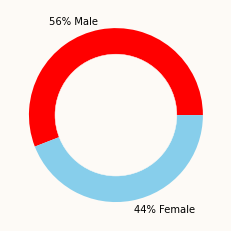

In [21]:
#FDFAF6
mf = [22548, 17788]
plt.pie(mf, labels=["56% Male", "44% Female"], colors=["red", "skyblue"])
my_circle=plt.Circle( (0,0), 0.7, color='#FDFAF6')
p=plt.gcf()
p.gca().add_artist(my_circle)
p.set_facecolor("#FDFAF6")

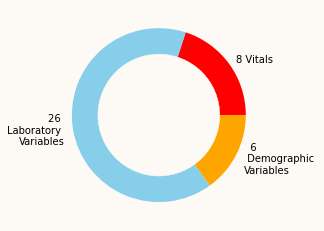

In [28]:
mf = [8, 26, 6]
plt.pie(mf, labels=["8 Vitals", "26 \nLaboratory \nVariables", "  6\n Demographic \nVariables"], colors=["red", "skyblue", "orange"])
my_circle=plt.Circle( (0,0), 0.7, color='#FDFAF6')
p=plt.gcf()
p.gca().add_artist(my_circle)
p.set_facecolor("#FDFAF6")

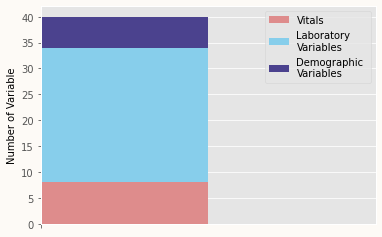

In [11]:
y0 = np.array([8])
y1 = np.array([26])
y2 = np.array([6])
x = [""]
labels = ["Vitals", "Laboratory \nVariables", "Demographic \nVariables"]
plt.bar(x, y0, color='#DE8C8C', width=0.2, align='center')
plt.bar(x, y1, bottom=y0, color='skyblue', width=0.2, align='center')
plt.bar(x, y2, bottom=y0+y1, color='#4B428E', width=0.2, align='center')
plt.ylabel("Number of Variable")
plt.legend(labels)
plt.xlim([0,0.2])
p=plt.gcf()
p.set_facecolor("#FDFAF6")

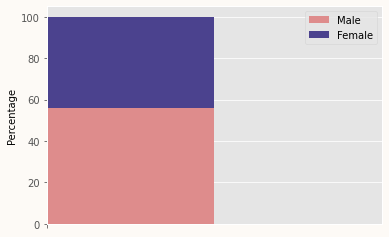

In [10]:
y0 = np.array([56])
y1 = np.array([44])
x = [""]
labels = ["Male", "Female"]
plt.bar(x, y0, color= '#DE8C8C', width=0.2, align='center')
plt.bar(x, y1, bottom=y0, color='#4B428E', width=0.2, align='center')
plt.ylabel("Percentage")
plt.legend(labels)
plt.xlim([0,0.2])
p=plt.gcf()
p.set_facecolor("#FDFAF6")

Text(0, 0.5, 'Percentage of Missing Values (%)')

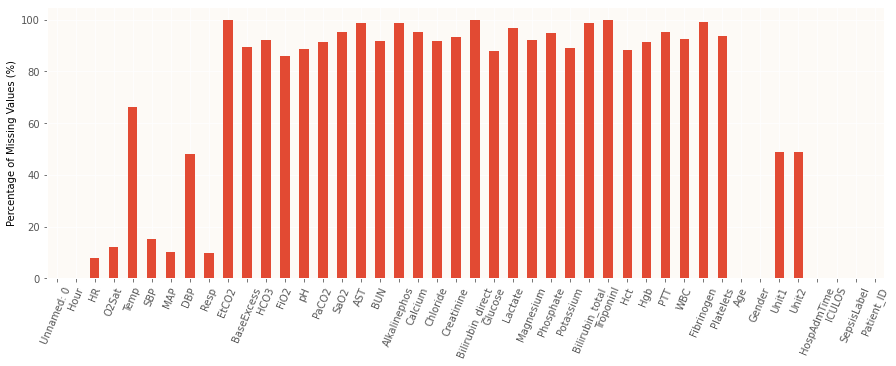

In [29]:
missing_data = df.isnull().sum()
missing_percent = (missing_data/df.shape[0])*100
ax = missing_percent.plot.bar(figsize=(15,5),rot=67)
ax.set_facecolor("#FDFAF6")
ax.set_ylabel("Percentage of Missing Values (%)")

In [30]:
df.isnull().sum().sum() / df.shape[0]

27.970614326480767

In [31]:
df.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [32]:
vitals = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2']
lab_values = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']
demographics = ['Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS']

In [37]:
( df[vitals].isnull().sum() / df[vitals].shape[0] ) * 100

HR         7.743336
O2Sat     12.032042
Temp      66.224255
SBP       15.211177
MAP       10.232405
DBP       48.125763
Resp       9.776833
EtCO2    100.000000
dtype: float64

In [38]:
( df[lab_values].isnull().sum() / df[lab_values].shape[0] ) * 100

BaseExcess          89.574863
HCO3                91.949406
FiO2                85.807027
pH                  88.532868
PaCO2               91.231753
SaO2                95.044387
AST                 98.504205
BUN                 91.840702
Alkalinephos        98.540650
Calcium             95.024392
Chloride            91.676063
Creatinine          93.357884
Bilirubin_direct    99.850420
Glucose             87.768392
Lactate             96.565112
Magnesium           92.219712
Phosphate           94.951247
Potassium           89.137640
Bilirubin_total     98.773372
TroponinI           99.877881
Hct                 88.223711
Hgb                 91.164303
PTT                 95.152459
WBC                 92.489639
Fibrinogen          99.236917
Platelets           93.482913
dtype: float64

In [39]:
( df[demographics].isnull().sum() / df[demographics].shape[0] ) * 100

Age             0.000000
Gender          0.000000
Unit1          48.868346
Unit2          48.868346
HospAdmTime     0.001012
ICULOS          0.000000
dtype: float64

In [ ]:
df.describe(include="all",datetime_is_numeric=True)

In [ ]:
round(100*(df.isnull().sum()/len(df.index)),2).plot.bar(figsize=(15,5))

In [ ]:
septic_shock_patients=df['Patient_ID'][df['SepsisLabel']==1].unique()
septic_df=df[df.Patient_ID.isin(septic_shock_patients)]
admitted_with_sepsis_patients=df['Patient_ID'][(df['SepsisLabel']==1) & (df['Hour']==0)]
admitted_with_sepsis_df=df[df.Patient_ID.isin(admitted_with_sepsis_patients)]
sepsis_after_adm_df=septic_df.merge(admitted_with_sepsis_df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
non_septic_df = df.merge(septic_df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
df['sepsisType']=np.nan
df.loc[df.Patient_ID.isin(admitted_with_sepsis_patients), 'sepsisType'] = 'SepsisBeforeAdm'
df.loc[df.Patient_ID.isin(septic_shock_patients) & df['sepsisType'].isnull(), 'sepsisType'] = 'SepsisAfterAdm'
df.loc[df['sepsisType'].isnull(), 'sepsisType'] = 'NonSepsis'
df['sepsisType'].value_counts()

In [ ]:
patient = df.loc[df["Patient_ID"] == 19878]

patient.tail()

<Axes: >

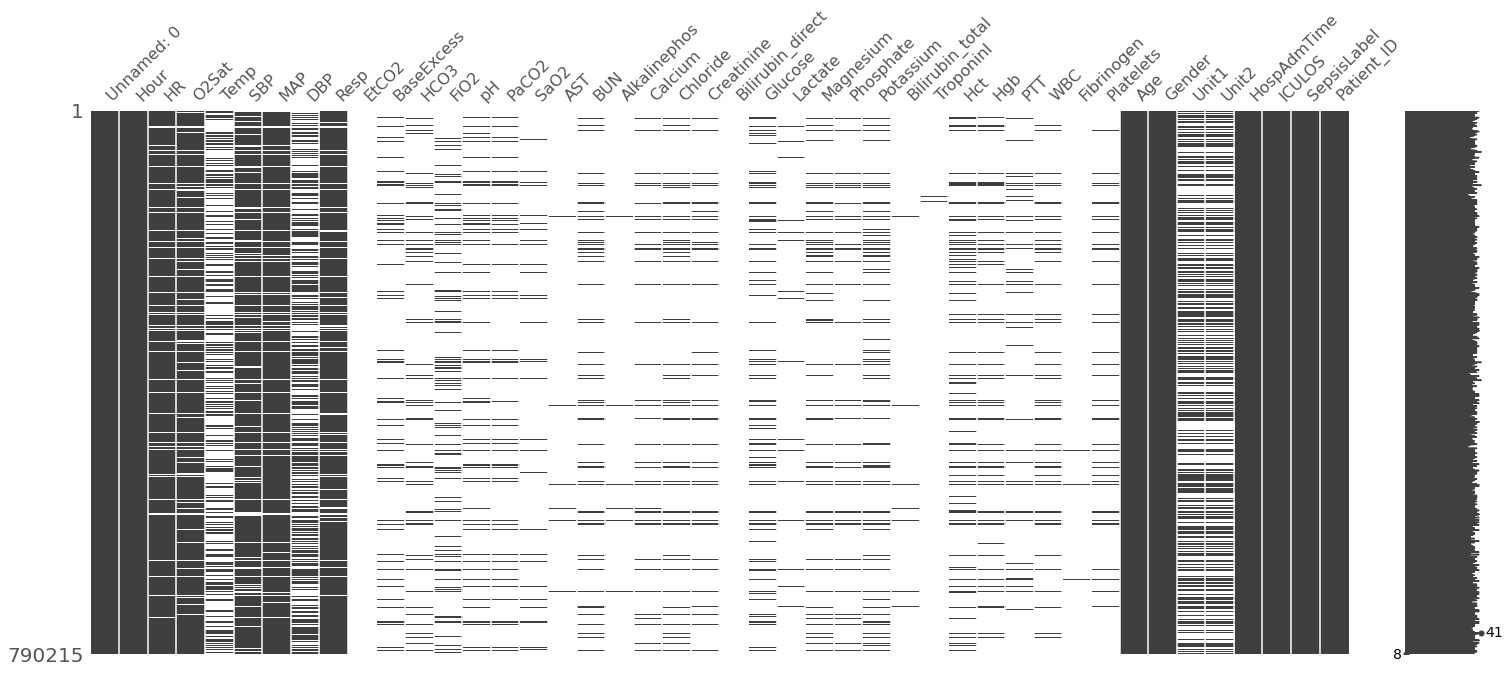

In [41]:
import missingno as msno
msno.matrix(df)

In [50]:
( df.isnull().sum() / df.shape[0] ) * 100 > 99

Unnamed: 0          False
Hour                False
HR                  False
O2Sat               False
Temp                False
SBP                 False
MAP                 False
DBP                 False
Resp                False
EtCO2                True
BaseExcess          False
HCO3                False
FiO2                False
pH                  False
PaCO2               False
SaO2                False
AST                 False
BUN                 False
Alkalinephos        False
Calcium             False
Chloride            False
Creatinine          False
Bilirubin_direct     True
Glucose             False
Lactate             False
Magnesium           False
Phosphate           False
Potassium           False
Bilirubin_total     False
TroponinI            True
Hct                 False
Hgb                 False
PTT                 False
WBC                 False
Fibrinogen           True
Platelets           False
Age                 False
Gender              False
Unit1       

In [ ]:
risk_score_labels = ['HR_risk', 'Temp_risk', 'Resp_risk', 'Creatinine_risk', 'MAP_risk', 'SBP_risk', 'Platelets_risk',
              'Bilirubin_total_risk']
data = pd.read_csv("temp_data.csv")
df = data.drop(["SepsisLabel"], axis=1)
correlation = df.corrwith(data["SepsisLabel"]).sort_values(ascending=False)
print(correlation[:20])